**<div style="font-size: 20px">Банки — Сегментация пользователей по потреблению</div >**

**Материалы:**

[Презентция](https://disk.yandex.ru/i/hbcTURTdMxefzw)

[Дашборд](https://public.tableau.com/app/profile/john6340/viz/Metanprom_16648077134410/Dashboard1)


**Задача:** 

Проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Описание:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

**План работы:**
1. Загрузка данных и предобработка
- Исследовать пропущенные значения;
- Исследовать соответствие типов;
- Исследовать дубликаты;
- Проверить корректность наименований колонок;
- Заменить пропущенные значения при необходимости.

2. Исследовательский анализ данных (EDA)
- распределение признаков
- распределение признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
- матрица корреляций

3. Сегментация
- по количеству потребляемых продуктов
- распределение признаков для сегментов

4. Проверка гипотез:

- **H0**: доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не различаются

- **H1**: доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различаются



- **H0**: Возраст клиентов, ушедших в отток и оставшихся, не различается 

- **H1**: Возраст клиентов, ушедших в отток и оставшихся, различается

5. Общие выводы и рекомендации

### 1.  Загрузка данных и предобработка

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/bank_dataset.csv')
df.head(15)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.isna().sum() #пропущенные значения

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

In [5]:
df.duplicated().sum() #дубликаты

0

Датасет состоит из 12 столбцов и 10000 строк. Столбец Balance имеет 3617 пропусков. Возможно это техническая ошибка либо это нулевой баланс на счёте, либо отсутствие у клиента дебетовой карты. С типами данных все в порядке.

#### Предобработка

Заменим пропуски в balance на 0

In [6]:
df['Balance'] = df['Balance'].fillna(0)

In [7]:
#переведем названия колонок в нижний регистр
df.columns = df.columns.str.lower()

In [8]:
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

### 2. Исследовательский анализ данных

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userid,10000.0,NaN,NaN,NaN,15733676.5694,71936.186123,15608437.0,15671264.25,15733474.0,15795969.75,15858426.0
score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
city,10000,3,Ярославль,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,М,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
objects,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
creditcard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
loyalty,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


- среднее количество объектов в собственности: 5
- среднее количество потребляемых продуктов: 1.5
- медианная заработная плата: 100000
- средний балл кредитного скоринга: 650
- средний возраст: 38 лет

Распределение признаков


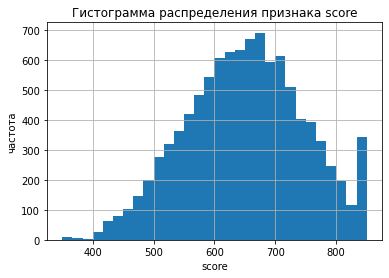

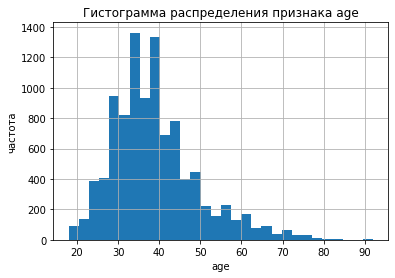

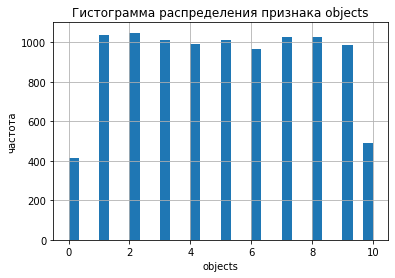

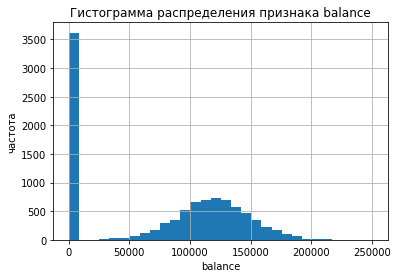

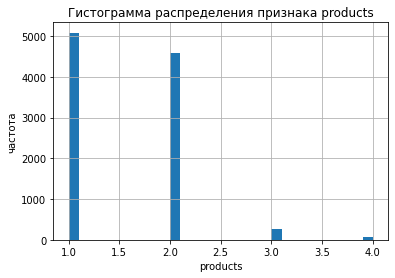

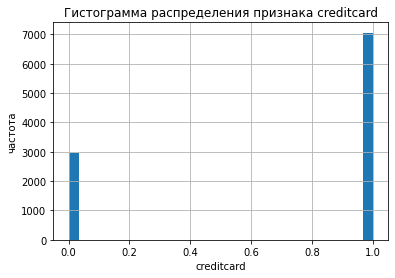

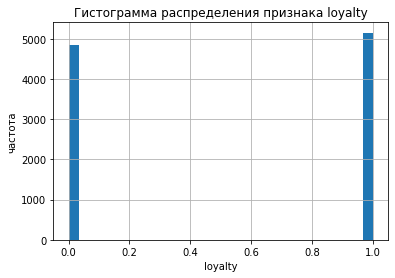

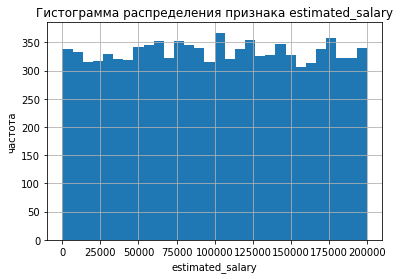

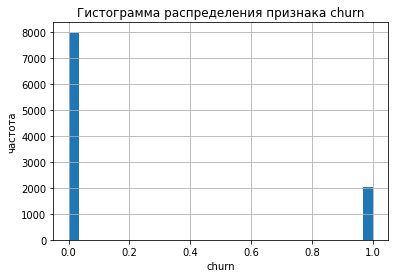

In [10]:
columns=['score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']
for i in range (len(columns)):
    df[columns[i]].hist(bins=30)
    plt.title('Гистограмма распределения признака ' + columns[i])
    plt.xlabel(columns[i])
    plt.ylabel('частота')
    plt.show()

- У большинства клиентов от 600 до 700 баллов кредитного скоринга. В тоже время присутствует аномальное количество клиентов с максимальным количеством баллов.
- Большинству клиентов от 32 до 40 лет. Данные распределены нормально
- Меньше всего клиентов, у которых 1 объект в собственности, либо объекты отсутствуют 
- У большинства клиентов от 100000 до 150000 на счете. После замены пропущенных значений на 0 у нас получилось аномально большое количество клиентов с нулевым балансом
- Большинство клиентов пользуются 1-2 продуктами. Клиентов, испльзующих от 3 до 4 продуктов, значительно меньшне 
- Клиентов, использующих кредитную карту, в 2 раза больше
- Активные и неактивные пользователи распределены примерно поровну
- Заработные платы клиентов распределены равномерно. Средняя з/п составляет 100000
- Клиетов, ушедших в отток, в 4 раза меньше

#### Взаимосвязь признаков и оттока

Построим гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

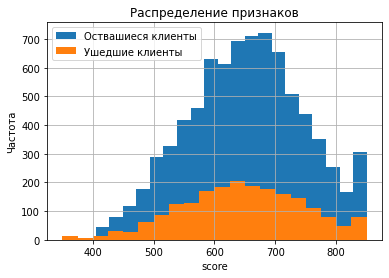

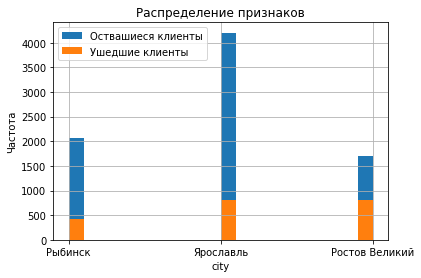

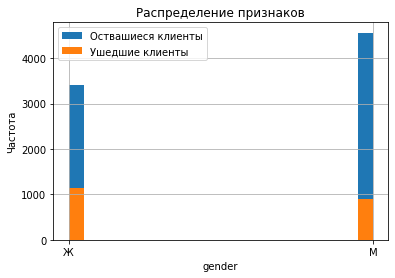

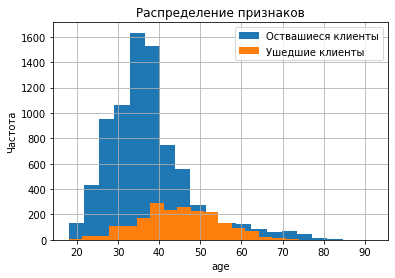

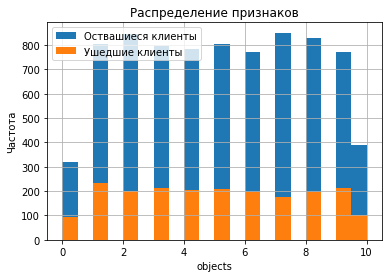

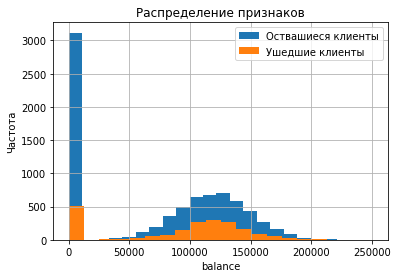

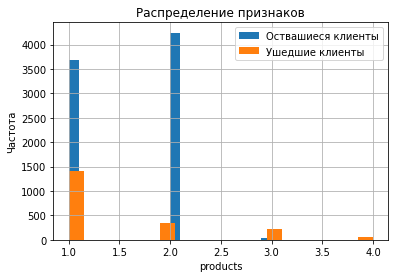

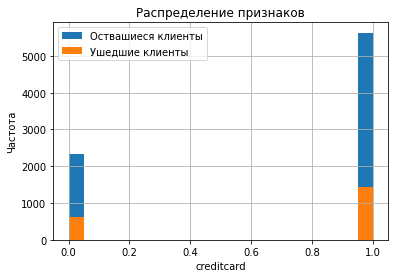

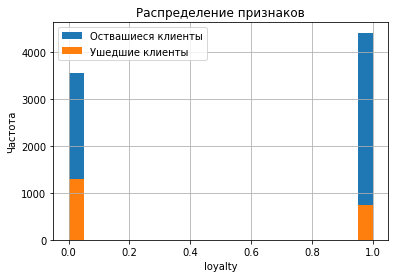

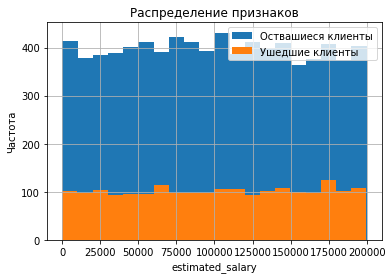

In [11]:
for i in df.drop(['churn', 'userid'], axis=1).columns:
    df.query('churn==0')[i].hist(bins=20, label='Оствашиеся клиенты')
    df.query('churn==1')[i].hist(bins=20, label='Ушедшие клиенты')
    plt.title('Распределение признаков')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

In [12]:
df.groupby('churn').mean()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,1.573390e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.573279e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


- Среди городов бОльшая доля ушедших клиентов наблюдается в Ростове Великом
- Женщины более склонны уходить в отток, чем мужчины
- Средний возраст клиентов, ушедших в отток, выше среднего возраста клиентов, которые остались
- Чем менее активен клиент, тем он более склонен уйти в отток
- Средний баланс на счете у клиентов, которые ушли, выше, чем у клиентов, которые остались.(возможно их не устраивают условия обслуживания в банке)
- Самая низкая доля оттока у клиентов, которые пользуются 2 продуктами. Кто пользуются 4 продуктами банка - все попадают в отток. У клиентов с 3 продуктами также наблюдается высокая доля оттока

для более детального анализа возраста проведем категоризацию по возрасту, после чего посмотрин на распределение категорий по оттоку и количеству используемых продуктов

In [13]:
def age_category(df):
    if df['age'] <= 30:
        return 'молодой'
    elif df['age'] <= 55:
        return 'средний возраст'
    else:
        return 'пенсионный возраст'

df['age_category'] = df.apply(age_category, axis=1)

In [14]:
age_products = df.pivot_table(index='products', columns='age_category', values='userid', aggfunc='count')
age_products

age_category,молодой,пенсионный возраст,средний возраст
products,,,
1,910,447,3727
2,1025,310,3255
3,31,35,200
4,2,8,50


In [15]:
age_churn = df.pivot_table(index='churn', columns='age_category', values='userid', aggfunc='count')
age_churn

age_category,молодой,пенсионный возраст,средний возраст
churn,,,
0,1820,506,5637
1,148,294,1595


Больше всего представлено клиентов среднего возраста. Доля оттока среди категорий самая большая у клиентов пенсионного возраста

Построим матрицу корреляций и отобразим её

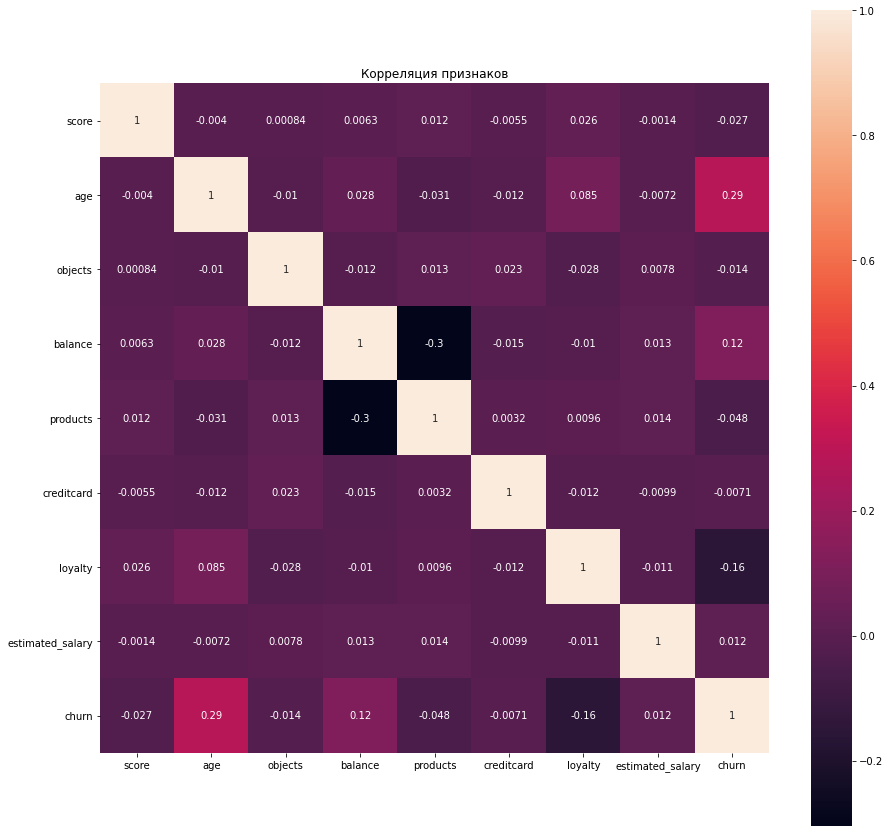

In [16]:
# корреляционная матрица
corr_m = df.drop('userid', axis=1).corr()
# heatmap
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True)
plt.title('Корреляция признаков')
plt.show()

Больше всего на отток влияют такие признаки, как возраст и активность

### 3. Сегментация пользователей  

По количеству используемых продуктов 

In [17]:
list_1=['gender', 'creditcard', 'loyalty', 'churn']
list_2=['score', 'balance', 'age', 'estimated_salary', 'objects']

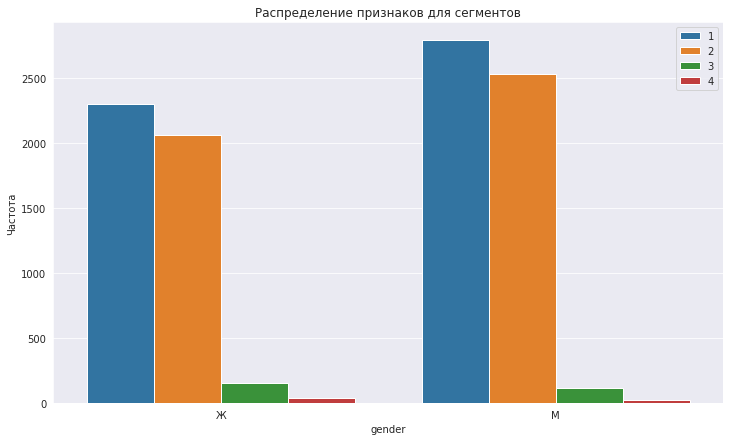

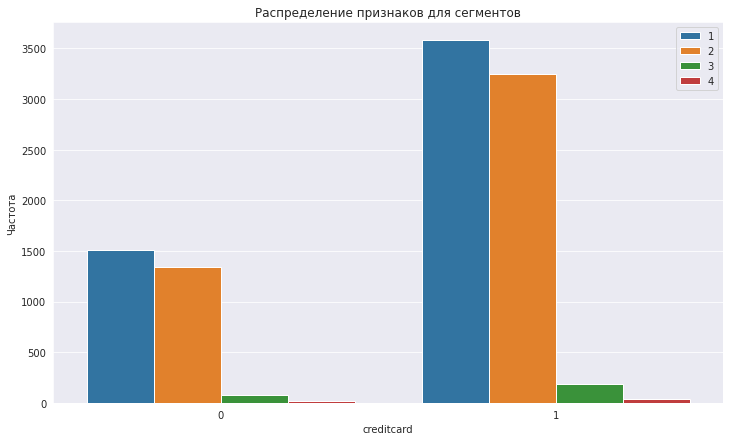

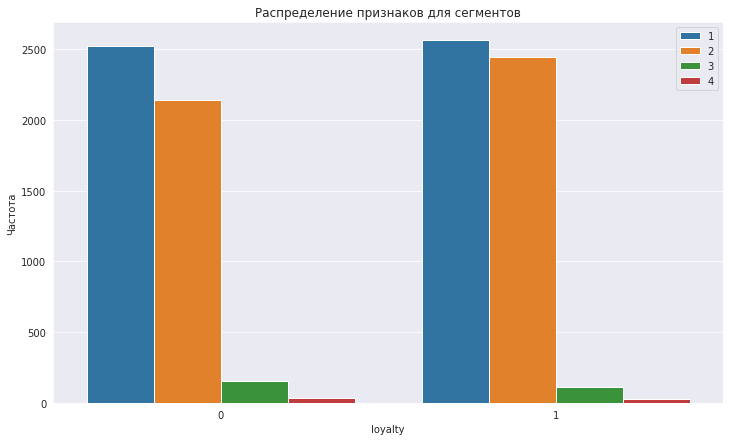

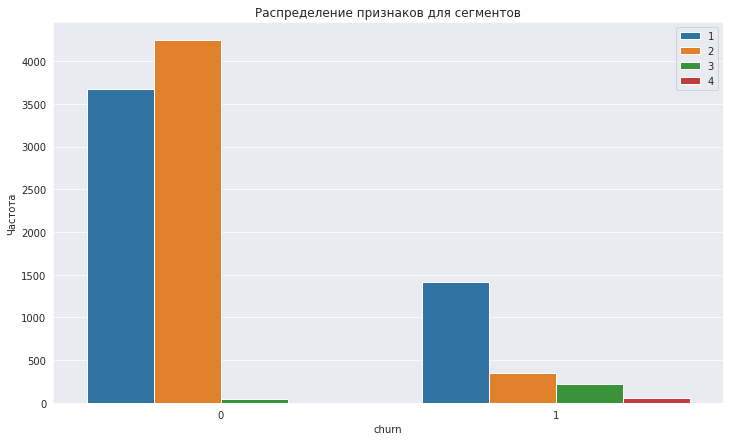

In [18]:
#построим countplot-графики для бинарных признаков
for column in list_1:
    plt.figure(figsize=(12, 7))
    sns.set_style("darkgrid")
    sns.countplot(x = df[column], hue='products', data=df)
    plt.title('Распределение признаков для сегментов')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

- количество потребляемых продуктов не зависит от пола, наличия  кредитной карты и активности


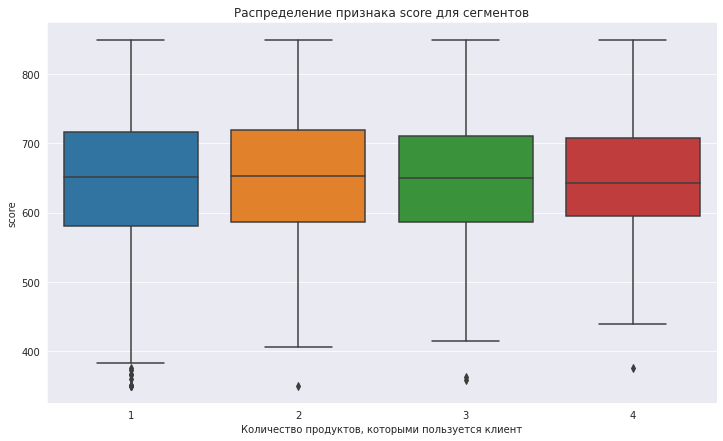

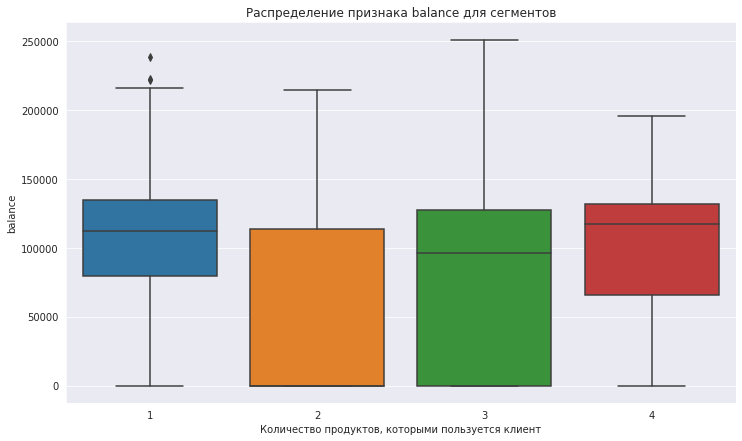

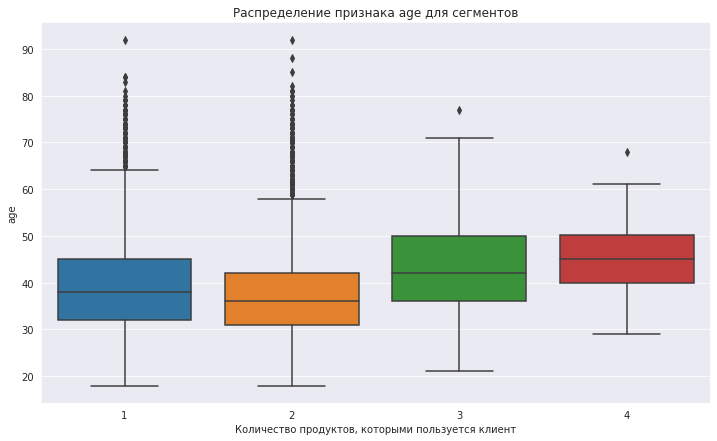

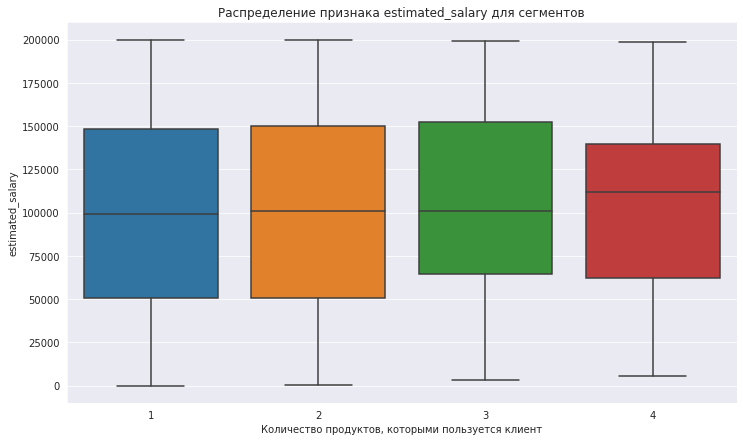

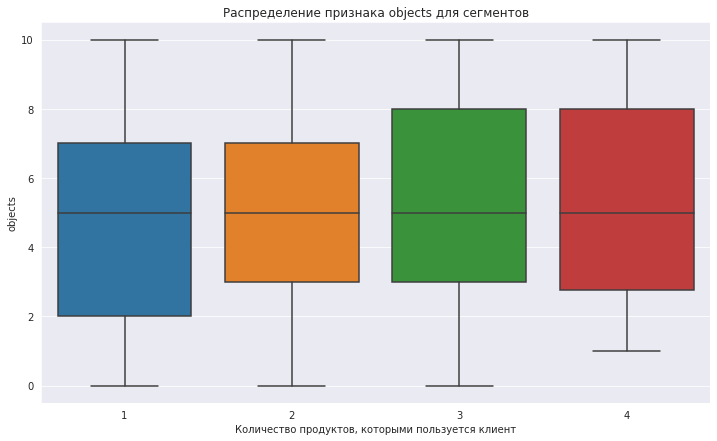

In [19]:
#построим catplot-графики для остальных признаков    
for column in list_2:
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='products', y=column, data=df)
    plt.title('Распределение признака {} для сегментов'.format(column))
    plt.xlabel('Количество продуктов, которыми пользуется клиент')
    plt.ylabel(column)
    plt.show()

In [20]:
df.groupby('products').mean()

,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,,
1,1.573237e+07,649.120968,39.673092,4.974626,98551.870614,0.703777,0.504131,99487.256851,0.277144
2,1.573484e+07,652.188671,37.753595,5.051852,51879.145813,0.707190,0.532898,100452.012821,0.075817
3,1.574182e+07,648.105263,43.195489,5.003759,75458.328195,0.714286,0.424812,104318.130564,0.827068
4,1.571936e+07,653.583333,45.683333,5.300000,93733.135000,0.683333,0.483333,104763.723333,1.000000


- Баллы кредитного скоринга не зависят на число используемых продуктов
- Баланс выше у клиентов, пользующихся либо одним продуктом, либо сразу несколькими.
- Самые молодые клиенты пользуются двумя продуктами, а самые взрослые - 3 и 4 продуктами банка
- Разница между заработной платой незначительная

Портрет клиента, склонного уйти в отток:
- Проживает в Ростове Великом 
- чаще клиент женского пола 
- средний возраст 40-50 лет
- неактивный клиент
- пользуется 3-4 продуктами банка
- высокий уровень дохода (около 100000)
- в среднем имеет 5 объектов в собственности

*Описание сегментов:*

Сегмент 1:

- количество используемых продуктов: 1
- отток клиентов: 27.7%
- средний возраст: 40 лет
- средняя зарплата: 99 000
- средний баланс на счёте: 98 000

Сегмент 2:

- количество используемых продуктов: 2
- отток клиентов: 7.6%
- средний возраст: 38 лет
- средняя зарплата: около 100 000
- средний баланс на счёте: 51 000

Сегмент 3:

- количество используемых продуктов: 3
- отток клиентов: 82.7%
- средний возраст: 43 лет
- средняя зарплата: около 100 000
- средний баланс на счёте: 75 000

Сегмент 4:

- количество используемых продуктов: 4
- отток клиентов: 100%
- средний возраст: 46 лет
- средняя зарплата: около 100 000
- средний баланс на счёте: 93 000

### 4. Проверка гипотез 

H0 доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не различаются

H1 доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различаются

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


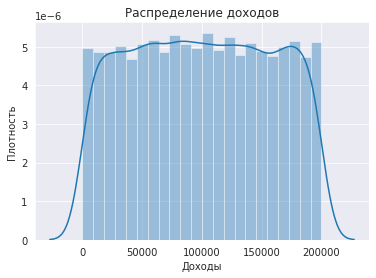

In [21]:
sns.distplot(df['estimated_salary']) #распределение доходов клиентов
plt.title('Распределение доходов')
plt.xlabel('Доходы')
plt.ylabel('Плотность')
plt.show()

Распределение не идеальное, но приближенное к нормальному. Воспользуемся критерием Манна-Уитни, так как он не требует нормального распределения выборок

In [22]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(df[df['products']==2]['estimated_salary'], df[df['products']==1]['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.4079566651927651
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Статистически значимых различий в доходе клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, нет

H0: Возраст клиентов, ушедших в отток и оставшихся, не различается
    
H1: Возраст клиентов, ушедших в отток и оставшихся, различается

Посмотрим на распределение возраста клиентов

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


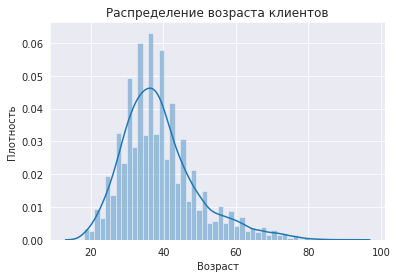

In [23]:
sns.distplot(df['age'])
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

Распределение приближено к нормальному, но есть вбросы ввиде клиентов пожилого возраста. Так же воспользуемся кретерием Манна-Уитни.

In [24]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(df[df['churn']==1]['age'], df[df['churn']==0]['age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  3.2104014319371675e-230
Отвергаем нулевую гипотезу: разница статистически значима


Различие в возрасте тех, кто ушел в отток и кто остался, имеет статистически значимую разницу

### 5. Общие выводы и рекомендации

В ходе исследования была установлена взаимосвязь признаков и оттока:
- среди городов бОльшая доля ушедших клиентов наблюдается в Ростове Великом;
- женщины более склонны уходить в отток, чем мужчины;
- средний возраст клиентов, ушедших в отток, выше среднего возраста клиентов, которые остались;
- чем менее активен клиент, тем он более склонен уйти в отток;
- средний баланс на счете у клиентов, которые ушли, выше, чем у клиентов, которые остались;
- самая низкая доля оттока у клиентов, которые пользуются 2 продуктами. Кто пользуются 4 продуктами банка - все попадают в отток. У клиентов с 3 продуктами также наблюдается высокая доля оттока.

Кроме того, была проведена сегментация пользователей по количеству используемых продуктов:
- количество потребляемых продуктов не зависит от пола, наличия  кредитной карты и активности;
- баллы кредитного скоринга не зависят на число используемых продуктов;
- баланс выше у клиентов, пользующихся либо одним продуктом, либо сразу несколькими;
- самые молодые клиенты пользуются двумя продуктами, а самые взрослые - 3 и 4 продуктами банка;
- разница между заработной платой незначительная.

Описание полученных сегментов:

Сегмент 1:

- количество используемых продуктов: 1
- отток клиентов: 27.7%
- средний возраст: 40 лет
- средняя зарплата: 99 000
- средний баланс на счёте: 98 000

Сегмент 2:

- количество используемых продуктов: 2
- отток клиентов: 7.6%
- средний возраст: 38 лет
- средняя зарплата: около 100 000
- средний баланс на счёте: 51 000

Сегмент 3:

- количество используемых продуктов: 3
- отток клиентов: 82.7%
- средний возраст: 43 лет
- средняя зарплата: около 100 000
- средний баланс на счёте: 75 000

Сегмент 4:

- количество используемых продуктов: 4
- отток клиентов: 100%
- средний возраст: 46 лет
- средняя зарплата: около 100 000
- средний баланс на счёте: 93 000

В ходе работы было проверено 2 гипотезы, по результатам которых установлено, что:
1. Статистически значимых различий в доходе клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, нет.
2. Различие в возрасте тех, кто ушел в отток и кто остался, имеет статистически значимую разницу.

По полученным результатам можно составить портрет клиента, склонного уйти в отток:
- проживает в Ростове Великом 
- чаще клиент женского пола 
- средний возраст 40-50 лет
- неактивный клиент
- пользуется 3-4 продуктами банка
- высокий уровень дохода (около 100000)
- в среднем имеет 5 объектов в собственности

Рекомендации:

Обратить внимание на клиентов, пользующихся 3 и 4 продуктами банка(сегмент 3 и 4), так как они имеют 82.7% и 100% отток соответственно, и разработать новую стратегии для работы и превлечения новых клиентов. Немаловажно обратить особое внимание на людей пенсионного возраста(основная часть отнесена к сегменту 1 и 2) и ввести льготы на продукты и услуги, так как данная категория клиентов наиболее склонна к оттоку. Возможно необходимо повысить процент по вкладам, так как средний баланс на счете у клиентов, которые ушли, выше, чем у клиентов, которые остались.
